<h2>Monte Carlo Simulation with Geometric Brownian Motion Model to Predict Future EUR/USD Exchange Rate</h2>

<p>In this notebook, we will be using the Geometric Brownian Motion (GBM) Model to predict the future evolution of the EUR/USD exchange rate. GBM is a stochastic process that is commonly used in financial modeling to simulate the random movement of assets such as stock prices, exchange rates, and commodity prices. It is based on two components: Drift and Volatility.</p>

The following formula shows how today's price is affected by its value yesterday and its return:

$$
Today's Price = Yesterday's Price \cdot e^{r}
$$

Where r is the logarithmic return of today's price with respect to yesterday's price. 

Next, we will use the Geometric Brownian Motion Model to predict the future evolution of the EUR/USD exchange rate. The model uses two components for Monte Carlo simulation: Drift and Volatility.

**Drift:** The direction in which returns have moved in the past, reflects the long-term trend in stock prices.

$$
drift = μ - \frac{1}{2} \cdot σ^2
$$

**Random Variable:** Represents the historical volatility of the evolution of the exchange rate multiplied by the value z of a random number between 0 and 1. The random variable is generated automatically. The Z value represents the probability of an event happening depending on how many standard deviations it deviates from the mean.

$$
Random Variable = σ \cdot Z(Random(0;1))
$$

Using the Greometric Brownian Model, the equation that generates future data for the exchange rate is as follows:

$$
Today's Price = Yesterday's Price \cdot e^{(μ-\frac{1}{2}\cdot σ^2)+σZ(Random(0;1))}
$$

Here, μ represents the expected return and σ represents the standard deviation of returns. 


```


In [15]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
import yfinance as yfin

%matplotlib inline

In [19]:
ticker = 'EURUSD=X' 
yfin.pdr_override()
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2003-12-1')['Adj Close']
data

[*********************100%***********************]  1 of 1 completed


,EURUSD=X
Date,
2003-12-01,1.196501
2003-12-02,1.208897
2003-12-03,1.212298
2003-12-04,1.208094
2003-12-05,1.218695
...,...
2023-05-05,1.102293
2023-05-08,1.101868
2023-05-09,1.099614


In [20]:
log_returns = np.log(1 + data.pct_change())
log_returns

,EURUSD=X
Date,
2003-12-01,NaN
2003-12-02,0.010307
2003-12-03,0.002809
2003-12-04,-0.003473
2003-12-05,0.008736
...,...
2023-05-05,-0.004164
2023-05-08,-0.000386
2023-05-09,-0.002047


**<font >In the dataframe above, we see that we have extracted 4,884 data from "Yahoo Finance", which are daily exchange rates of EUR/USD starting from December 2003 until September 29, 2022 (analysis date).</font>**

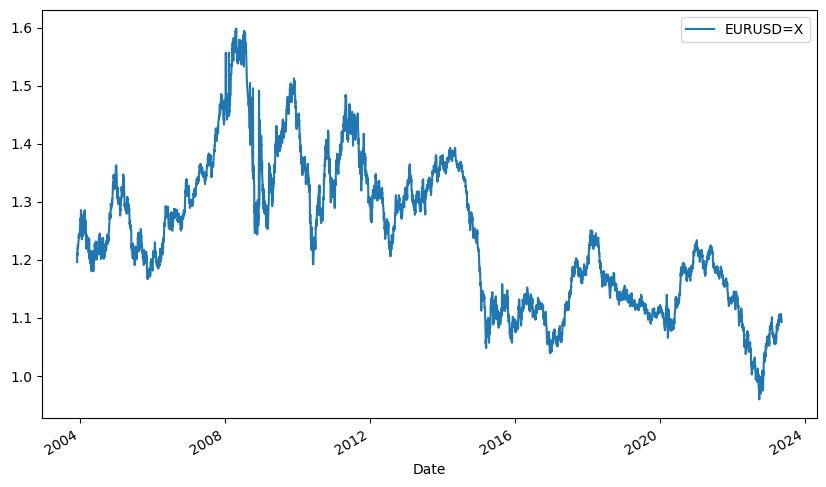

In [21]:
data.plot(figsize=(10, 6));

**<font >The graph above shows the historical evolution of the price of the EUR/USD.</font>**



<AxesSubplot: xlabel='Date'>

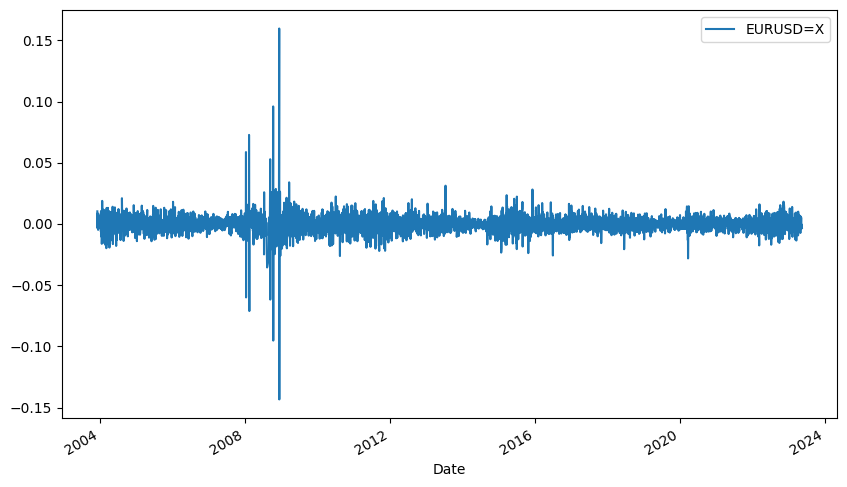

In [22]:
log_returns.plot(figsize = (10, 6))

**<font >The graph above shows the logarithmic returns of the EUR/USD price. This graph shows that the returns follow a normal distribution and are stationary around mean.</font>**




In [23]:
u = log_returns.mean()
u

EURUSD=X   -0.000018
dtype: float64

In [24]:
var = log_returns.var()
var

EURUSD=X    0.000053
dtype: float64

$$
drift = μ - \frac{1}{2} \cdot σ^2
$$

In [25]:
drift = u - (.5 * var)
drift

EURUSD=X   -0.000044
dtype: float64

In [26]:
stdev = log_returns.std()
stdev

EURUSD=X    0.007246
dtype: float64

In [27]:
norm.ppf(0.95)

1.6448536269514722

In [28]:
x = np.random.rand(10, 2)
x

array([[0.95197532, 0.43989858],
       [0.22173595, 0.67488939],
       [0.87147768, 0.03332911],
       [0.38010007, 0.52048879],
       [0.41684583, 0.66199906],
       [0.44870979, 0.89638164],
       [0.99173074, 0.92278904],
       [0.70949415, 0.95355607],
       [0.26896653, 0.84883522],
       [0.67302913, 0.24897243]])

In [29]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.23109172, -0.84095888],
       [ 1.45281282,  0.30308725],
       [-0.36703222,  1.57064279],
       [-1.67680161,  1.04161577],
       [-0.92228552, -2.2013363 ],
       [-1.44586446, -0.82156512],
       [ 1.28736707, -0.78258308],
       [-2.34778569,  0.07347731],
       [ 0.47348277, -1.4868176 ],
       [ 0.17082107,  1.45967774]])

$$
Variable Random = σ \cdot Z(Random(0;1))
$$
<br />

In [30]:
norm.ppf(x)

array([[ 1.6643157 , -0.15122635],
       [-0.76634356,  0.4534549 ],
       [ 1.13340397, -1.83397152],
       [-0.30521797,  0.05138037],
       [-0.20996926,  0.41792509],
       [-0.12892173,  1.2612002 ],
       [ 2.39680937,  1.42408485],
       [ 0.55190753,  1.68035707],
       [-0.61594159,  1.03145062],
       [ 0.44829301, -0.67772692]])

In [32]:
t_intervals = 235
iterations = 100

**<font >We are going to predict exchange rates for 235 days, that is until 31/12/2023. The number of scenarios is 100.</font>**


$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [33]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [34]:
daily_returns

array([[0.98453975, 0.986534  , 0.99446488, ..., 0.99684029, 0.99627844,
        1.00530373],
       [1.00914998, 0.99874868, 0.99960536, ..., 1.00372591, 0.99402509,
        1.01190532],
       [0.9921058 , 0.98846393, 0.99284426, ..., 0.98336994, 0.99597299,
        1.00187106],
       ...,
       [0.99832954, 0.99942483, 0.98877731, ..., 0.99539213, 0.99557157,
        1.01138874],
       [1.00196653, 0.99461569, 1.0102388 , ..., 0.98726057, 1.00973025,
        1.00498336],
       [1.00077304, 1.01405396, 0.99661959, ..., 1.00463645, 1.00953171,
        1.00039759]])

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [35]:
S0 = data.iloc[-1]
S0

EURUSD=X    1.093016
Name: 2023-05-11 00:00:00, dtype: float64

In [36]:
price_list = np.zeros_like(daily_returns)

In [37]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
price_list[0] = S0
price_list

array([[1.09301567, 1.09301567, 1.09301567, ..., 1.09301567, 1.09301567,
        1.09301567],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [40]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [41]:
price_list

array([[1.09301567, 1.09301567, 1.09301567, ..., 1.09301567, 1.09301567,
        1.09301567],
       [1.10301674, 1.09164796, 1.09258432, ..., 1.09708815, 1.086485  ,
        1.10602837],
       [1.0943093 , 1.07905462, 1.08476607, ..., 1.07884351, 1.08210971,
        1.10809781],
       ...,
       [1.21993098, 1.02960483, 1.04655317, ..., 1.00274319, 1.05078163,
        0.95320704],
       [1.22233001, 1.02406113, 1.05726862, ..., 0.98996882, 1.061006  ,
        0.95795721],
       [1.22327492, 1.03845324, 1.05369462, ..., 0.99455876, 1.0711192 ,
        0.95833809]])

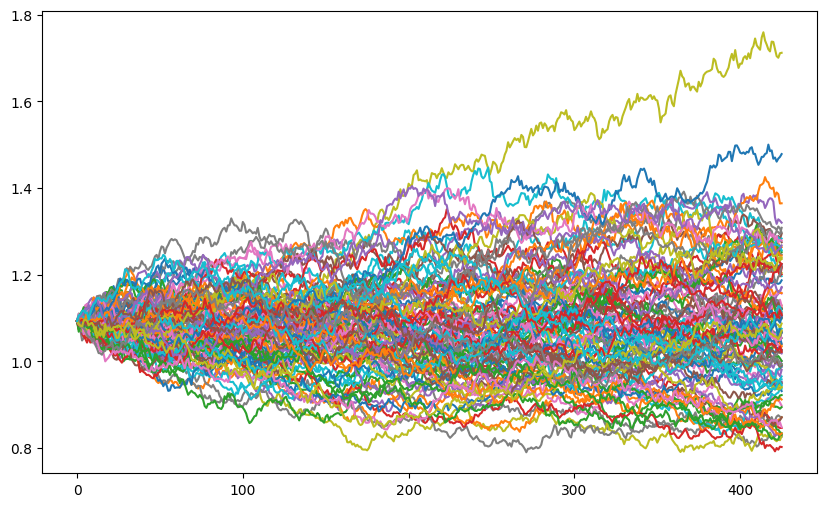

In [42]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

**<font >The above figure gives us the Monte Carlo result.</font>**

In [49]:
# df = pd.DataFrame(price_list).T
# df.to_csv('MC-EUR/USD.csv')